# Import Libraries

In [2]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

# index_col=0 makes sure the content of the first column of the csv will be used

### Exploring and Checking Data

In [4]:
print("input train: " + str(loan_data_inputs_train.shape))
print("output train: " + str(loan_data_targets_train.shape))

print("input test: " + str(loan_data_inputs_test.shape))
print('output test: ' + str(loan_data_targets_test.shape))

# So it seems everything is fine and the shapes are matching.

input train: (709903, 242)
output train: (709903, 1)
input test: (177476, 242)
output test: (177476, 1)


In [5]:
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

In [6]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
329489,24043908,26416773,16000.0,16000.0,16000.0,60 months,16.29,391.56,D,D2,...,0,0,1,1,0,0,0,0,0,0
510073,65677198,70310039,6350.0,6350.0,6350.0,36 months,12.59,212.71,C,C2,...,0,0,0,1,0,0,0,0,0,0
905,1058556,1290346,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,...,0,0,0,1,0,0,0,0,0,0
333036,23133441,25486278,4800.0,4800.0,4800.0,36 months,11.67,158.68,B,B4,...,0,0,0,1,0,0,0,0,0,0
298787,28693850,31217040,4500.0,4500.0,4500.0,36 months,12.99,151.61,C,C1,...,0,1,0,0,0,0,0,1,0,0


### Selecting the Features

Let's create a new df called with reference categories to store only the dummy variables we are going to use for the PD model.

The number of dummy variables we must create is equal to (k-1) where k is the number of different values that the categorical variable can take on.

Now we must remove one dummy for each original variable. Otherwise we will fall in the so-called dummy variable trap. This occurs when we create k dummy variables instead of k-1 dummy variables.

Dummy Variable Trap: When the number of dummy variables created is equal to the number of values the categorical value can take on. This leads to multicollinearity, which causes incorrect calculations of regression coefficients and p-values.

In [7]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:AK',
'addr_state:OK_SD_AL',
'addr_state:AR',
'addr_state:AZ',
'addr_state:CA',
'addr_state:CO',
'addr_state:CT',
'addr_state:VT_WV_WY_NH_DC_MS_NE_ND_ME',
'addr_state:DE',
'addr_state:FL',
'addr_state:GA',
'addr_state:IA_ID_NV_HI',
'addr_state:IL',
'addr_state:IN',
'addr_state:MT_KS',
'addr_state:KY',
'addr_state:UT_LA',
'addr_state:MA',
'addr_state:MD',
'addr_state:MI',
'addr_state:MN',
'addr_state:MO',
'addr_state:MS',
'addr_state:NC',
'addr_state:NJ',
'addr_state:NM',
'addr_state:NY',
'addr_state:OH',
'addr_state:OR',
'addr_state:PA',
'addr_state:RI',
'addr_state:SC',
'addr_state:TN',
'addr_state:TX',
'addr_state:VA',
'addr_state:WA',
'addr_state:WI',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'installment:<=760',
'installment:760-990',
'installment:>990',
'annual_inc:<30K',
'annual_inc:30K-60K',
'annual_inc:60K-90K',
'annual_inc:90K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]


In [8]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:IA_ID_NV_HI',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:0',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'installment:>990',
'annual_inc:<30K',
'mths_since_last_delinq:Missing',
'dti:>35',
'mths_since_last_record:Missing'
]

In [9]:
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:AK,addr_state:OK_SD_AL,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
329489,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
510073,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
905,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333036,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298787,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# PD Model Estimation

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)
# We create an instance of an object from the 'LogisticRegression' class.

In [12]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class with inputs contained in the first dataframe and targets contained in the second dataframe.

c:\Users\kajin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

In [13]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([-1.50720572])

In [14]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.02139044,  0.87934789,  0.71574017,  0.52652756,  0.36417319,
         0.20775468,  0.13690059,  0.08622007,  0.38796237,  0.14516419,
         0.24202882,  0.16789048,  0.15872653,  0.44519047,  0.36126582,
         0.64396481,  0.22938695,  0.09180852,  0.24284861,  0.39655549,
         0.15277763,  0.44013357,  0.26791171,  0.14981071,  0.18642821,
         0.11188936,  0.18517222,  0.15454026,  0.18547475, -0.39497608,
         0.16618064,  0.15905944,  0.15280423,  0.12778401,  0.27084374,
         0.31834042,  0.2348649 ,  0.17719542,  0.40625794,  0.17267985,
         0.30852944,  0.12968924,  0.31029916,  0.28299   ,  0.06688316,
        -0.02930356,  0.24610166,  0.30414661,  0.19428808,  0.20528005,
         0.13687527,  0.03746594,  0.10344628,  0.13536777,  0.1002614 ,
         0.09674868,  0.16757296,  2.00900727,  0.7976117 ,  0.71028589,
         0.51859349,  0.3805789 ,  0.14289416, -0.07110019,  1.13918295,
         0.6917044 ,  0.38805479,  0.15074662,  0.0

In [15]:
# Creating a Summary Table dataframe which will contain the feature names and their corresponding coefficients

# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values      

# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients' with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg.coef_)

# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1

# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# Sorts the dataframe by index.
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.507206
1,grade:A,1.021390
2,grade:B,0.879348
3,grade:C,0.715740
4,grade:D,0.526528
...,...,...
119,mths_since_last_record:3-20,0.066632
120,mths_since_last_record:21-31,0.094557
121,mths_since_last_record:32-80,0.210867
122,mths_since_last_record:81-86,-0.013705


## Build a Logistic Regression Model with P-Values

In [16]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

Prevent "LinAlgError: Singular matrix" Error

The reason for this is that there is one of your columns that has all zero values, that is why it fails at the inverse transformation. You can fix it by removing the column with all zeros.

In [17]:
# col=0

# for column_name in inputs_train.columns.values:
    #value = inputs_train.iloc[:,col].sum()
    #col += 1
    #print(column_name + "=" + str(value))

# manual extracting - for next maintenance, try to do it automatticaly with pandas boolean formula 

In [18]:
# generating p_values for the logistic regression.
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

reg = LogisticRegression_with_p_values()

In [19]:
# Estimates the coefficients of the object from the 'LogisticRegression' class with inputs contained in the first dataframe and targets contained in the second dataframe.
 
reg.fit(inputs_train, loan_data_targets_train)


c:\Users\kajin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\kajin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.050893
1,grade:A,1.066686
2,grade:B,0.916397
3,grade:C,0.747794
4,grade:D,0.553543
...,...,...
119,mths_since_last_record:3-20,0.070813
120,mths_since_last_record:21-31,0.100442
121,mths_since_last_record:32-80,0.209428
122,mths_since_last_record:81-86,-0.014986


In [21]:
# We take the list result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = reg.p_values

In [22]:
p_values

[6.086000536407116e-44,
 2.41390798543835e-60,
 2.078270310667953e-48,
 1.1695034461726539e-30,
 4.701687088937651e-19,
 5.011515015259609e-07,
 6.522663623560786e-31,
 4.535159805740926e-06,
 0.0004142305299692088,
 0.002399172920163078,
 0.0003885191600387741,
 0.00046180669138535,
 1.390503858286776e-05,
 4.9314470556853885e-18,
 6.5475402914355e-11,
 2.9723041426251338e-30,
 0.02717268189232052,
 0.025485589053645737,
 4.807863886821348e-08,
 3.230304818181485e-20,
 0.00627695411258443,
 2.567116088785428e-13,
 2.2323313403729763e-05,
 0.002278563339325515,
 8.786325963217762e-05,
 0.022795861454111287,
 8.889995123167106e-05,
 0.002456050795496113,
 0.00035428818349515166,
 0.0002501379903746584,
 0.0002663505117536832,
 0.0002595627475296132,
 0.05207520349940072,
 0.001032465870470569,
 9.275948456591868e-10,
 3.223433606290569e-08,
 6.269642241185486e-08,
 0.04338227838860697,
 1.1001306585614908e-11,
 0.0024458857214725337,
 1.0972521706048974e-15,
 0.00367973275669036,
 9.079

In [23]:
# Add the intercept for completeness.
# We add the value 'NaN' in the beginning of the variable with p-values.

p_values = np.append(np.nan, np.array(p_values))

In [24]:
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table['p_values'] = p_values

In [25]:
pd.set_option('max_row', None)

In [26]:
print(summary_table)

                              Feature name  Coefficients       p_values
0                                Intercept     -1.050893            NaN
1                                  grade:A      1.066686   6.086001e-44
2                                  grade:B      0.916397   2.413908e-60
3                                  grade:C      0.747794   2.078270e-48
4                                  grade:D      0.553543   1.169503e-30
5                                  grade:E      0.385382   4.701687e-19
6                                  grade:F      0.224100   5.011515e-07
7                  home_ownership:MORTGAGE      0.136358   6.522664e-31
8                       home_ownership:OWN      0.083819   4.535160e-06
9                            addr_state:AK      0.372631   4.142305e-04
10                     addr_state:OK_SD_AL      0.136449   2.399173e-03
11                           addr_state:AR      0.234065   3.885192e-04
12                           addr_state:AZ      0.160800   4.618

In [27]:
summary_table['p_values']

0                NaN
1       6.086001e-44
2       2.413908e-60
3       2.078270e-48
4       1.169503e-30
5       4.701687e-19
6       5.011515e-07
7       6.522664e-31
8       4.535160e-06
9       4.142305e-04
10      2.399173e-03
11      3.885192e-04
12      4.618067e-04
13      1.390504e-05
14      4.931447e-18
15      6.547540e-11
16      2.972304e-30
17      2.717268e-02
18      2.548559e-02
19      4.807864e-08
20      3.230305e-20
21      6.276954e-03
22      2.567116e-13
23      2.232331e-05
24      2.278563e-03
25      8.786326e-05
26      2.279586e-02
27      8.889995e-05
28      2.456051e-03
29      3.542882e-04
30      2.501380e-04
31      2.663505e-04
32      2.595627e-04
33      5.207520e-02
34      1.032466e-03
35      9.275948e-10
36      3.223434e-08
37      6.269642e-08
38      4.338228e-02
39      1.100131e-11
40      2.445886e-03
41      1.097252e-15
42      3.679733e-03
43      9.079260e-11
44      8.133189e-07
45      1.715688e-06
46      1.328449e-02
47      2.676

In [28]:
stat_signfc = 0.05 # statistical significance
test = summary_table['Feature name'][p_values > stat_signfc]

<ipython-input-28-deedb5ae7387>:2: RuntimeWarning: invalid value encountered in greater
  test = summary_table['Feature name'][p_values > stat_signfc]


In [29]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not statistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:AK',
'addr_state:OK_SD_AL',
'addr_state:AR',
'addr_state:AZ',
'addr_state:CA',
'addr_state:CO',
'addr_state:CT',
'addr_state:VT_WV_WY_NH_DC_MS_NE_ND_ME',
'addr_state:DE',
'addr_state:FL',
'addr_state:GA',
'addr_state:IA_ID_NV_HI',
'addr_state:IL',
'addr_state:IN',
'addr_state:MT_KS',
'addr_state:KY',
'addr_state:UT_LA',
'addr_state:MA',
'addr_state:MD',
'addr_state:MI',
'addr_state:MN',
'addr_state:MO',
'addr_state:MS',
'addr_state:NC',
'addr_state:NJ',
'addr_state:NM',
'addr_state:NY',
'addr_state:OH',
'addr_state:OR',
'addr_state:PA',
'addr_state:RI',
'addr_state:SC',
'addr_state:TN',
'addr_state:TX',
'addr_state:VA',
'addr_state:WA',
'addr_state:WI',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
#'total_acc:<=27',
#'total_acc:28-51',
#'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'installment:<=760',
'installment:760-990',
'installment:>990',
'annual_inc:<30K',
'annual_inc:30K-60K',
'annual_inc:60K-90K',
'annual_inc:90K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:IA_ID_NV_HI',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
#'delinq_2yrs:0',
'inq_last_6mths:>6',
#'total_acc:<=27',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'installment:>990',
'annual_inc:<30K',
'mths_since_last_delinq:Missing',
'dti:>35',
'mths_since_last_record:Missing'
]

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:AK,addr_state:OK_SD_AL,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
329489,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
510073,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
905,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333036,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298787,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [32]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

c:\Users\kajin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\kajin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
feature_name = inputs_train.columns.values

In [34]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.250613
1,grade:A,1.078027
2,grade:B,0.927645
3,grade:C,0.760665
4,grade:D,0.568373
5,grade:E,0.401928
6,grade:F,0.243022
7,home_ownership:MORTGAGE,0.134161
8,home_ownership:OWN,0.084724
9,addr_state:AK,0.385777


In [35]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.250613,NaN
1,grade:A,1.078027,3.181416e-45
2,grade:B,0.927645,1.957070e-62
3,grade:C,0.760665,1.030225e-50
4,grade:D,0.568373,8.194334e-33
5,grade:E,0.401928,3.462343e-21
6,grade:F,0.243022,2.858788e-08
7,home_ownership:MORTGAGE,0.134161,4.045755e-30
8,home_ownership:OWN,0.084724,3.567505e-06
9,addr_state:AK,0.385777,2.552362e-04


In [36]:
import pickle

In [37]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [42]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:AK',
'addr_state:OK_SD_AL',
'addr_state:AR',
'addr_state:AZ',
'addr_state:CA',
'addr_state:CO',
'addr_state:CT',
'addr_state:VT_WV_WY_NH_DC_MS_NE_ND_ME',
'addr_state:DE',
'addr_state:FL',
'addr_state:GA',
'addr_state:IA_ID_NV_HI',
'addr_state:IL',
'addr_state:IN',
'addr_state:MT_KS',
'addr_state:KY',
'addr_state:UT_LA',
'addr_state:MA',
'addr_state:MD',
'addr_state:MI',
'addr_state:MN',
'addr_state:MO',
'addr_state:MS',
'addr_state:NC',
'addr_state:NJ',
'addr_state:NM',
'addr_state:NY',
'addr_state:OH',
'addr_state:OR',
'addr_state:PA',
'addr_state:RI',
'addr_state:SC',
'addr_state:TN',
'addr_state:TX',
'addr_state:VA',
'addr_state:WA',
'addr_state:WI',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
#'total_acc:<=27',
#'total_acc:28-51',
#'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'installment:<=760',
'installment:760-990',
'installment:>990',
'annual_inc:<30K',
'annual_inc:30K-60K',
'annual_inc:60K-90K',
'annual_inc:90K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [43]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
 
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:IA_ID_NV_HI',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
#'delinq_2yrs:0',
'inq_last_6mths:>6',
#'total_acc:<=27',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'installment:>990',
'annual_inc:<30K',
'mths_since_last_delinq:Missing',
'dti:>35',
'mths_since_last_record:Missing'
]

In [44]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:AK,addr_state:OK_SD_AL,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
550946,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
292628,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
739899,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
302859,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
653323,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [46]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
"""
model.predict_proba(pntus) returns the probability that the output is 1
generates a array of arrays
Each of these arrays is composed of two elements.
PD = The first element is the probability of default or the probability of being a bad borrower.
1 = PD = And the second element is the probability of non default or the probability of being a good borrower.

we need only the second element (good borrower)
"""

'\nmodel.predict_proba(pntus) returns the probability that the output is 1\ngenerates a array of arrays\nEach of these arrays is composed of two elements.\nPD = The first element is the probability of default or the probability of being a bad borrower.\n1 = PD = And the second element is the probability of non default or the probability of being a good borrower.\n\nwe need only the second element (good borrower)\n'

In [48]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [49]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.03865325, 0.96134675],
       [0.04872822, 0.95127178],
       [0.00468483, 0.99531517],
       ...,
       [0.02563883, 0.97436117],
       [0.00831441, 0.99168559],
       [0.02353616, 0.97646384]])

In [50]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.96134675, 0.95127178, 0.99531517, ..., 0.97436117, 0.99168559,
       0.97646384])

In [51]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [52]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.96134675, 0.95127178, 0.99531517, ..., 0.97436117, 0.99168559,
       0.97646384])

In [53]:
loan_data_targets_test_temp = loan_data_targets_test

In [54]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [55]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [56]:
df_actual_predicted_probs.shape

(177476, 2)

In [57]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [58]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [59]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
550946,1,0.961347
292628,1,0.951272
739899,1,0.995315
302859,1,0.851715
653323,1,0.956685


### Accuracy and Area under the Curve

In [60]:
# estimated probability <= cut-off probability: bad (default)
# estimated probability > cut-off probability: good (non-default)

In [61]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [62]:
# MAKING A CONFUSION MATRIX
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7153,4653
1,34814,130856


In [63]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.040304,0.026218
1,0.196162,0.737317


In [64]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.7776206360296603

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99974589, 0.99974589,
        1.        ]),
 array([0.00000000e+00, 6.03609585e-06, 4.52707189e-04, ...,
        9.99951711e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99795171, 0.99795171, 0.99717736, ..., 0.48345882, 0.38470234,
        0.33821581]))

In [67]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

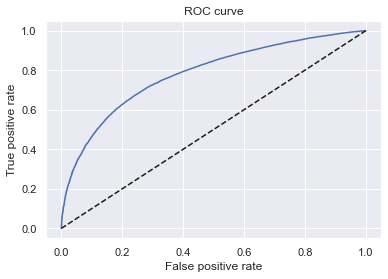

In [69]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".
plt.savefig("ROCcurve.png", dpi=100)

In [70]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7809132639100846

In [71]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.250613,NaN
1,grade:A,1.078027,3.181416e-45
2,grade:B,0.927645,1.957070e-62
3,grade:C,0.760665,1.030225e-50
4,grade:D,0.568373,8.194334e-33
5,grade:E,0.401928,3.462343e-21
6,grade:F,0.243022,2.858788e-08
7,home_ownership:MORTGAGE,0.134161,4.045755e-30
8,home_ownership:OWN,0.084724,3.567505e-06
9,addr_state:AK,0.385777,2.552362e-04


In [72]:
codebreaker

NameError: name 'codebreaker' is not defined

### Gini and Kolmogorov-Smirnov

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [ ]:
df_actual_predicted_probs.head()

In [ ]:
df_actual_predicted_probs.tail()

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [ ]:
df_actual_predicted_probs.head()

In [ ]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [ ]:
df_actual_predicted_probs.head()

In [ ]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [ ]:
df_actual_predicted_probs.head()

In [ ]:
df_actual_predicted_probs.tail()

In [ ]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [ ]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

In [ ]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [ ]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

# Applying the PD Model

### Calculating PD of individual accounts

In [ ]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [ ]:
inputs_test_with_ref_cat.head()

In [ ]:
summary_table

In [ ]:
y_hat_test_proba

### Creating a Scorecard

In [ ]:
ref_categories

In [ ]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

In [ ]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

In [ ]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

In [ ]:
min_score = 1
max_score = 1000

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

In [ ]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

In [ ]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

In [ ]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

In [ ]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [ ]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

In [ ]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

### Caclulating Credit Score

In [ ]:
inputs_test_with_ref_cat.head()

In [ ]:
df_scorecard

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [ ]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

In [ ]:
scorecard_scores.shape

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(136, 1)

In [ ]:
scorecard_scores.shape

In [ ]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [ ]:
y_scores.head()

In [ ]:
y_scores.tail()

### From Credit Score to PD

In [ ]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [ ]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

In [ ]:
y_hat_test_proba[0: 5]

In [ ]:
df_actual_predicted_probs['y_hat_test_proba'].head()

### Setting Cut-offs

In [ ]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

In [ ]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
thresholds

In [ ]:
thresholds.shape

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [ ]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs.tail()

In [ ]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs.tail()

In [ ]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

In [ ]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

In [ ]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [ ]:
df_scorecard.to_csv('df_scorecard.csv')